<a href="https://colab.research.google.com/github/BigBisus/LabPy5/blob/master/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('students.csv')

# Первые 5 строк
print(df.head(),'\n')

# Информация о данных
print('\n',df.info())

# Статистика
print(df.describe())

# Средний балл
print("Средний балл студентов:", df['Score'].mean())

# Количество студентов в каждой группе
print("Количество студентов в группах:")
print(df['Group'].value_counts())

     Name  Age Group  Score
0    Анна   19     A   78.0
1   Борис   20     B   85.0
2  Виктор   21     A   92.0
3  Галина   18     C   55.0
4   Денис   22     B    NaN 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    15 non-null     object 
 1   Age     15 non-null     int64  
 2   Group   13 non-null     object 
 3   Score   13 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 612.0+ bytes

 None
             Age      Score
count  15.000000  13.000000
mean   20.466667  73.307692
std     1.767430  13.774279
min    18.000000  49.000000
25%    19.000000  64.000000
50%    20.000000  73.000000
75%    21.500000  85.000000
max    24.000000  92.000000
Средний балл студентов: 73.3076923076923
Количество студентов в группах:
Group
A    5
B    4
C    4
Name: count, dtype: int64


In [21]:
import pandas as pd

df = pd.read_csv('students.csv')

# Студенты с баллом выше 80
high_scores = df[df['Score'] > 80]

# Сортировка по убыванию балла
sorted_scores = high_scores.sort_values(by='Score', ascending=False)
print("Студенты с баллом выше 80:")
print(sorted_scores)

# Самый старший студент
print("Самый старший студент:")
print(df.loc[df['Age'].idxmax()])

# Самый младший студент
print("Самый младший студент:")
print(df.loc[df['Age'].idxmin()])

Студенты с баллом выше 80:
       Name  Age Group  Score
2    Виктор   21     A   92.0
11  Николай   24     A   90.0
7     Игорь   23     A   88.0
1     Борис   20     B   85.0
10    Мария   20     C   81.0
Самый старший студент:
Name     Николай
Age           24
Group          A
Score       90.0
Name: 11, dtype: object
Самый младший студент:
Name     Галина
Age          18
Group         C
Score      55.0
Name: 3, dtype: object


In [22]:
import pandas as pd

df = pd.read_csv('students.csv')

# Проверка пропусков
print("Пропуски по столбцам:")
print(df.isnull().sum())

# Заполнение пропусков в Score средним
mean_score = df['Score'].mean()
df['Score'] = df['Score'].fillna(mean_score)

# Удаление строк с пропусками в Group
df = df.dropna(subset=['Group'])

# Проверка результата
print("Данные после обработки пропусков:")
print(df.head())

Пропуски по столбцам:
Name     0
Age      0
Group    2
Score    2
dtype: int64
Данные после обработки пропусков:
     Name  Age Group      Score
0    Анна   19     A  78.000000
1   Борис   20     B  85.000000
2  Виктор   21     A  92.000000
3  Галина   18     C  55.000000
4   Денис   22     B  73.307692


In [23]:
import pandas as pd

df = pd.read_csv('students.csv')

# Обработка пропусков как в task3
df['Score'] = df['Score'].fillna(df['Score'].mean())
df = df.dropna(subset=['Group'])

# Группировка по группам
group_stats = df.groupby('Group').agg({
    'Score': 'mean',
    'Age': 'median'
})
print("Средний балл и медианный возраст по группам:")
print(group_stats)

# Добавление столбца Passed
df['Passed'] = (df['Score'] >= 60).astype(int)
print("Данные со столбцом Passed:")
print(df.head())

Средний балл и медианный возраст по группам:
           Score   Age
Group                 
A      83.600000  21.0
B      73.153846  20.5
C      64.500000  18.5
Данные со столбцом Passed:
     Name  Age Group      Score  Passed
0    Анна   19     A  78.000000       1
1   Борис   20     B  85.000000       1
2  Виктор   21     A  92.000000       1
3  Галина   18     C  55.000000       0
4   Денис   22     B  73.307692       1


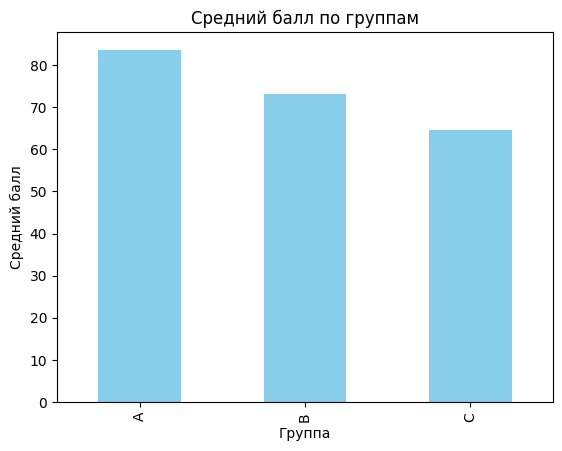

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('students.csv')
df['Score'] = df['Score'].fillna(df['Score'].mean())
df = df.dropna(subset=['Group'])

# Гистограмма распределения баллов
plt.figure()
df['Score'].hist(bins=20, edgecolor='black')
plt.title("Распределение баллов")
plt.xlabel("Баллы")
plt.ylabel("Количество студентов")
plt.savefig("score_histogram.png")
plt.close()

# Столбчатая диаграмма среднего балла по группам
plt.figure()
group_means = df.groupby('Group')['Score'].mean()
group_means.plot(kind='bar', color='skyblue')
plt.title("Средний балл по группам")
plt.xlabel("Группа")
plt.ylabel("Средний балл")
plt.savefig("group_scores_bar.png")

plt.show()